In [42]:
import torch
from torchvision import models, transforms

c:\python37\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


In [43]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

model = models.resnet50(pretrained=True)

In [44]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [45]:
import torch.nn as nn

num_flame_params = 412

model.fc = nn.Linear(model.fc.in_features, num_flame_params)

In [46]:
from torch.utils.data import Dataset, DataLoader
import os
import glob
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, images_folder, transform = None):
        self.images_folder = images_folder
        self.transform = transform
        
        self.find_samples()
        
    def find_samples(self):
        self.image_paths = glob.glob(self.images_folder + '*.jpg')
        print("Found {} samples".format(len(self.image_paths)))
        
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image
    
    def __len__(self):
        return len(self.image_paths)

In [47]:
path = "data/neutral_images/"

dataset = CustomDataset(path, transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
len(dataset)

Found 831 samples


831

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


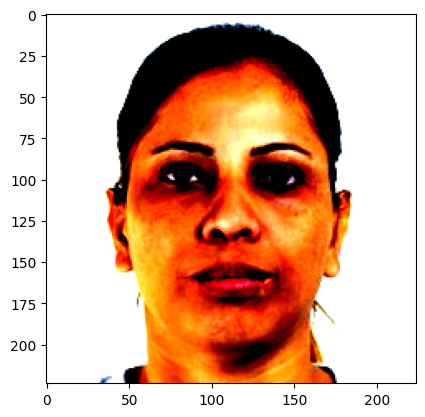

In [48]:
from matplotlib import pyplot as plt

image = next(iter(dataloader))[0].permute(1, 2, 0)

print(image.shape)

plt.imshow(image)

In [54]:
%%capture

model.eval()

In [50]:
def get_rgb_image(dataloader):
    next_batch = next(iter(dataloader))
    first_image = next_batch[0]
    
    return first_image.permute(1, 2, 0)


rgb_image = get_rgb_image(dataloader)
rgb_image.shape

torch.Size([224, 224, 3])

[]

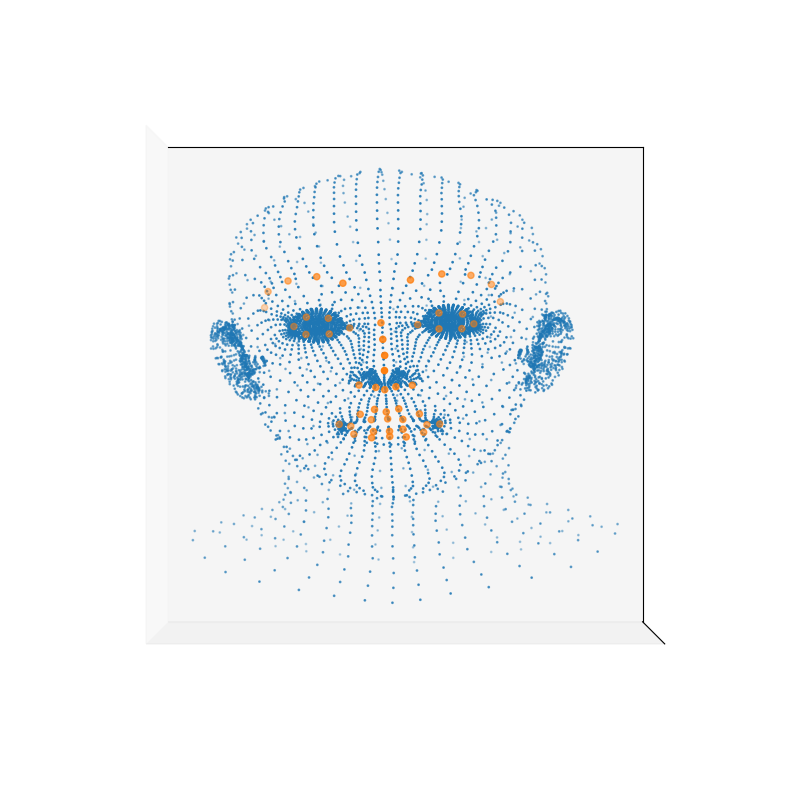

In [51]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

path = '../results/landmark_3d.ply'
point_cloud = o3d.io.read_point_cloud(path)

landmarks = np.load('../results/target_3d_lmks.npy')

# Convert the point cloud to a numpy array
points = np.asarray(point_cloud.points)

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)
ax.scatter(landmarks[:, 0], landmarks[:, 1], landmarks[:, 2])

ax.view_init(elev=90, azim=-90)

# Set the labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.grid(False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

In [52]:
o3d.visualization.draw_geometries([point_cloud])

In [28]:
landmarks.shape

(51, 3)